In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
msft = pdr.DataReader('MSFT', 'iex', start = '2013-01-01', end = '2018-04-30')
msft = msft.rename(index = {i: pd.datetime(int(i[:4]), int(i[5:7]), int(i[8:10])) for i in msft.index.values.tolist()})

5y


In [4]:
window = 50
data = []
for i in range(msft.shape[0] - window - 1):
    data.append(np.array(msft.iloc[i:i+window+1,3] / msft.iloc[i,3]))

In [5]:
train_size = int(0.9 * len(data))
train = np.array(data[:train_size])
test = np.array(data[train_size:])
np.random.seed(2018)
np.random.shuffle(train)
x_train = train[:,:-1]
y_train = train[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [6]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(input_shape=(layers[1], layers[0]), output_dim=layers[1], return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2], return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

In [7]:
model = build_model([1, 50, 100, 1])

C:\Users\bingt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), return_sequences=True, units=50)`
  after removing the cwd from sys.path.
C:\Users\bingt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # Remove the CWD from sys.path while we load stuff.


In [8]:
model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1, verbose=1)

Train on 944 samples, validate on 105 samples
Epoch 1/10
944/944 [==============================] - 4s 4ms/step - loss: 0.7496 - val_loss: 0.0154
Epoch 2/10
944/944 [==============================] - 2s 2ms/step - loss: 0.0818 - val_loss: 0.2126
Epoch 3/10
944/944 [==============================] - 2s 2ms/step - loss: 0.1426 - val_loss: 8.8083e-04
Epoch 4/10
944/944 [==============================] - 1s 1ms/step - loss: 0.0078 - val_loss: 8.7684e-04
Epoch 5/10
944/944 [==============================] - 1s 1ms/step - loss: 0.0078 - val_loss: 9.6266e-04
Epoch 6/10
944/944 [==============================] - 2s 2ms/step - loss: 0.0085 - val_loss: 8.9833e-04
Epoch 7/10
944/944 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.0010
Epoch 8/10
944/944 [==============================] - 1s 1ms/step - loss: 0.0085 - val_loss: 0.0011
Epoch 9/10
944/944 [==============================] - 1s 1ms/step - loss: 0.0079 - val_loss: 0.0021
Epoch 10/10
944/944 [=================

In [9]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, np.sqrt(train_score)))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

Train Score: 0.01 MSE (0.11 RMSE)
Test Score: 0.01 MSE (0.12 RMSE)


In [10]:
y_pred = model.predict(x_test)

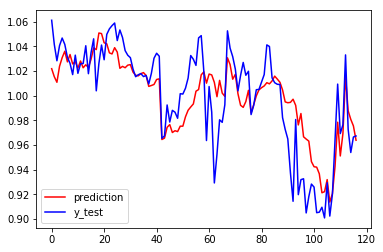

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_pred / np.mean(y_pred), color='red', label='prediction')
plt.plot(y_test / np.mean(y_test), color='blue', label='y_test')
plt.legend(loc='lower left')
plt.show()